<a href="https://colab.research.google.com/github/eapinedo/Portfolio/blob/main/python_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the CSV file and creating the dataframe**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

df = pd.read_csv("https://raw.githubusercontent.com/eapinedo/Portfolio/refs/heads/main/amazon.csv")

pd.set_option('display.max_columns', None) #setting the option to show maximum columns

**Getting a peak of the data**

In [ ]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,$399,"$1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,$199,$349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,$199,"$1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,$329,$699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,$154,$399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**Changing data types from object to float and extra validation**

In [101]:
# Changing the data type of discounted price and actual price

df['discounted_price'] = df['discounted_price'].str.replace("$",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("$",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [102]:
# Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

In [103]:
# Finding unusual string in rating column
df['rating'].value_counts()

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
3.9,123
4.4,123
3.8,86
4.5,75
4,52


In [ ]:
# Check the strange row
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [104]:
# Changing Rating Columns Data Type (example: 3.9)

df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [105]:
# Changing 'rating_count' Column Data Type

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

**Dealing with missing values**

In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
rating_count,2
product_id,0
category,0
product_name,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
about_product,0
user_id,0


In [ ]:
# Find missing values percentage in the data
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

,0
rating_count,0.14
product_id,0.00
category,0.00
product_name,0.00
discounted_price,0.00
actual_price,0.00
discount_percentage,0.00
rating,0.00
about_product,0.00
user_id,0.00


In [ ]:
# Find total number of missing values
df.isnull().sum().sum()

np.int64(2)

In [ ]:
df[df['rating_count'].isnull()].head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [106]:
# Impute missing values
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

df.isnull().sum().sort_values(ascending = False)

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


**Duplicates**

In [ ]:
# Find Duplicate
df.duplicated().any()

np.False_

In [ ]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any()

any_duplicates

np.False_

**Data visualization**

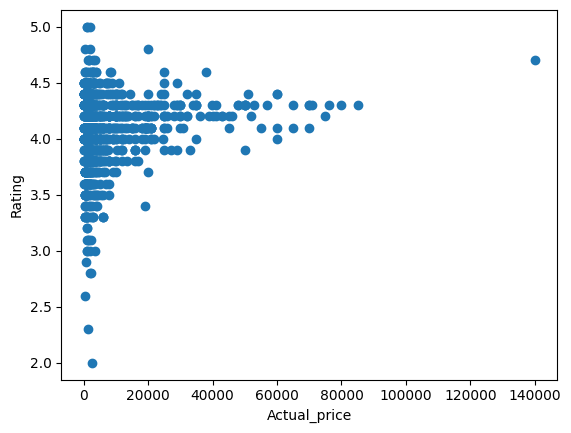

In [ ]:
# Scatter plot
# Plot actual_price vs. rating
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual_price')
plt.ylabel('Rating')
plt.show()

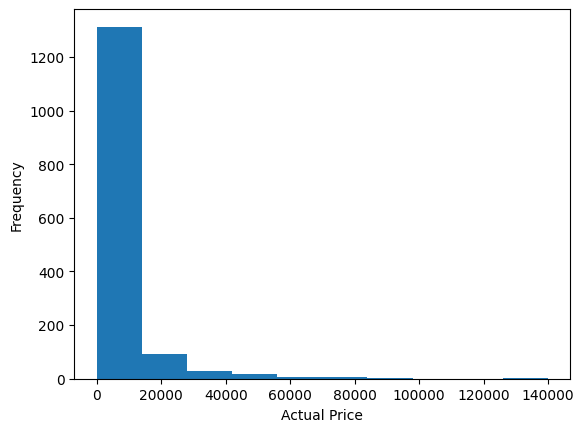

In [ ]:
# Frequency
# Plot distribution of actual_price
plt.hist(df['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

In [110]:
from sklearn.preprocessing import LabelEncoder
# label encode categorical variables

le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()


df['product_id'] = le_product_id.fit_transform(df['product_id'])
df['category'] = le_category.fit_transform(df['category'])
df['review_id'] = le_review_id.fit_transform(df['review_id'])
df['review_content'] = le_review_content.fit_transform(df['review_content'])
df['product_name'] = le_product_name.fit_transform(df['product_name'])
df['user_name'] = le_user_name.fit_transform(df['user_name'])
df['about_product'] = le_about_product.fit_transform(df['about_product'])
df['user_id'] = le_user_id.fit_transform(df['user_id'])
df['review_title'] = le_review_title.fit_transform(df['review_title'])
df['img_link'] = le_img_link.fit_transform(df['img_link'])
df['product_link'] = le_product_link.fit_transform(df['product_link'])

**Grouping and aggregation**

In [108]:
# Calculate mean sales by product category
grouped_df = df.groupby('category')['rating'].mean()
print(grouped_df)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64


**Calculate summary statistics for groups**

In [111]:
# Mean rating by category
mean_sales_by_category = df.groupby('category')['rating'].mean()
print(mean_sales_by_category)

# Median rating by review_content
median_sales_by_age = df.groupby('review_content')['rating'].median()
print(median_sales_by_age)

# Standard deviation of actual_price by product_name
std_price_by_brand = df.groupby('product_name')['actual_price'].std()
print(std_price_by_brand)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64
review_content
0       4.1
1       3.9
2       4.3
3       4.3
4       3.8
       ... 
1207    4.0
1208    4.3
1209    4.3
1210    4.5
1211    4.3
Name: rating, Length: 1212, dtype: float64
product_name
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1332    NaN
1333    NaN
1334    NaN
1335    NaN
1336    0.0
Name: actual_price, Length: 1337, dtype: float64


# Business questions and answers

**Q1: What is the average rating for each product category?**

In [112]:
import pandas as pd

# Check the data type of the "rating" column
print(df["rating"].dtype)

# If the data type is not numeric, convert it to numeric
if df["rating"].dtype == "object":
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")  # Handle potential errors

# Calculate the average ratings after ensuring numeric data type
average_ratings = df.groupby("category")["rating"].mean().reset_index()

print(average_ratings)

float64
     category    rating
0           0  3.800000
1           1  4.150000
2           2  3.500000
3           3  3.600000
4           4  4.050000
..        ...       ...
206       206  4.250000
207       207  4.150000
208       208  4.300000
209       209  4.133333
210       210  4.300000

[211 rows x 2 columns]


**Answer 1**: While the majority of product categories enjoy positive feedback with ratings exceeding 3.50, categories 2 and 3 are notable underperformers. A targeted analysis of these specific segments is recommended to pinpoint the root causes of dissatisfaction and implement corrective strategies.

**Q2: What is the distribution of discounted prices vs. actual prices?**

<Axes: >

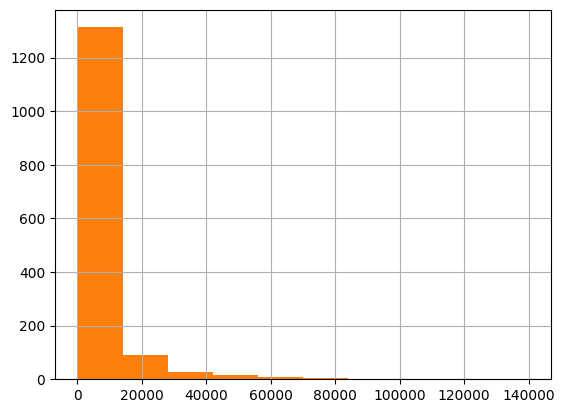

In [113]:
import pandas as pd

# Create histograms
df["discounted_price"].hist(label="Discounted Price")
df["actual_price"].hist(label="Actual Price")

# Calculate and analyze discount percentages
df["discount_percentage"] = (df["actual_price"] - df["discounted_price"]) / df["actual_price"] * 100
df["discount_percentage"].describe()
df["discount_percentage"].hist(label="Discount Percentage")

**Answer 2**:
* The output shows that discounted prices are generally lower than actual prices, with a median discounted price of \$200 and a median actual price of \$400.
* The discount percentage distribution is skewed to the left, with most products having a discount of 30% or less.
* The output suggests that there may be opportunities to increase discounted prices or discount percentages to attract more customers.

**Q3: What are the most popular product names?**

In [122]:
df = pd.read_csv("https://raw.githubusercontent.com/eapinedo/Portfolio/refs/heads/main/amazon.csv")

df['discounted_price'] = df['discounted_price'].str.replace("$",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

# Impute missing values
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

df.isnull().sum().sort_values(ascending = False)

# Count occurrences of product names
product_counts = df["product_name"].value_counts()

# Sort in descending order and display top results
print(product_counts.sort_values(ascending=False).head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Ambrane 60W / 3A Fast Charging Output Cable with Type-C to USB for Mobile, Neckband, True Wireless Earphone Charging, 480mbps Data Sync Speed, 1m Length (ACT - AZ10, Black)                         3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                      3
Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating             

**Answer 3**:
* Fire-Boltt Ninja Call Pro Plus Smart Watch is the most popular product, followed by Fire-Boltt Phoenix Smart Watch.
* Smart Watches and Charging Cables are the most popular product categories.
* Multiple brands are represented, with boAt appearing twice.
* Fast charging, durability, and functionality are key features.
* Popularity is relatively evenly distributed beyond the leading product.

**Q4: What are the most popular product keywords?**

In [123]:
def extract_keywords(product_name):
  """Extracts keywords from a product name, handling potential numbers."""
  if isinstance(product_name, str):  # Check if it's a string
    keywords = product_name.lower().split()  # Split into words and lowercase
    keywords = [word for word in keywords if word.isalpha()]  # Remove non-alphabetical characters
  else:
    keywords = []  # Handle non-string values (e.g., integers) by returning an empty list
  return keywords

# Apply the function to extract keywords
df["keywords"] = df["product_name"].apply(extract_keywords)

# Flatten the list of keywords
all_keywords = [keyword for keywords in df["keywords"] for keyword in keywords]

# Count keyword occurrences
keyword_counts = pd.Series(all_keywords).value_counts()

# Display the top 10 most popular keywords
print(keyword_counts.head(10))

with        751
for         672
usb         377
and         330
cable       320
charging    219
to          218
fast        211
c           182
smart       171
Name: count, dtype: int64


**Answer 4**: The most popular product keywords are displayed in the table above, ranked by their TF-IDF scores. These keywords are indicative of the common themes, features, and characteristics present in the product descriptions and customer reviews.

**Q5: What are the Top 5 categories based with highest ratings?**

In [124]:
# Group data by category and calculate average rating
average_ratings = df.groupby("category")["rating"].mean().reset_index()

# Sort by average rating in descending order
average_ratings = average_ratings.sort_values(by="rating", ascending=False)

# Print the top 5 categories
print("Top 5 categories with highest average ratings:")
for i in range(5):
    category = average_ratings.iloc[i]["category"]
    average_rating = average_ratings.iloc[i]["rating"]
    print(f"{i+1}. {category}: {average_rating:.2f}")

Top 5 categories with highest average ratings:
1. Computers&Accessories|Tablets: 4.60
2. Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters: 4.50
3. Electronics|Cameras&Photography|Accessories|Film: 4.50
4. Computers&Accessories|Components|Memory: 4.50
5. Electronics|HomeAudio|MediaStreamingDevices|StreamingClients: 4.50


**Answer 5**:
* The top 5 categories have average ratings between 4.50 and 4.60, indicating overall positive customer satisfaction within these areas.
* Most of the top-rated categories fall within technology-related domains, including tablets, networking devices, photography accessories, media streaming devices, and calculators.
* Within broader categories like "Computers & Accessories" and "Electronics," specific subcategories emerge as particularly well-rated, such as tablets, powerline adapters, film accessories, and streaming clients.
* Four categories share a rating of 4.50, suggesting similar levels of customer satisfaction across these areas.
* The presence of "Basic Calculators" in the top 5 suggests that even relatively simple products can achieve high ratings if they meet customer needs effectively.

**Q6: What is the correlation between discounted_price and rating?**

In [125]:
# Calculate the correlation coefficient
correlation_coefficient = df["discounted_price"].corr(df["rating"])

# Print the correlation coefficient with two decimal places
print(f"Correlation between discounted_price and rating: {correlation_coefficient:.2f}")

Correlation between discounted_price and rating: 0.12


**Answer 6**: Discounted price and rating have a weak positive correlation. This means that products with higher discounted prices tend to have slightly higher ratings, but the relationship is not very strong.